<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
    Pattern Recognition and Biometrics
  </h1>
</div>

<h1 style="color:white; background-color: #ADD8E6; padding:15px; text-align: center;">
TP Cluster
</h1>

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Library
</h2>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
data = pd.read_csv("optdigits.tra")

data_test = pd.read_csv("optdigits.tes")

In [69]:
display(data)

,0,1,6,15,12,1.1,0.1,0.2,0.3,7,...,0.21,0.22,0.23,6.3,14.1,7.4,1.3,0.24,0.25,0.26
0,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
1,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
2,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
3,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
4,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3818,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3819,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3820,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


# K-Means

In [85]:
X_train = data.iloc[:, :64]
y_train = data.iloc[:, 64]
X_test = data_test

On récupère le clustering dans kmeans, et on récupére les labels de tout les points.


La deuxième ligne attribue les étiquettes de cluster à une variable appelée "labels". Chaque élément de "labels" correspond à l'affectation de cluster d'une ligne dans l'ensemble de données "data". Par exemple, si "labels[0]" est 3, cela signifie que la première ligne de "data" a été affectée au cluster 3 par l'algorithme KMeans.

In [89]:
kmeans = KMeans(n_clusters = 10,n_init=5 ).fit(X_train)
labels = kmeans.labels_
clusters = kmeans.predict(X_train)
count_df = pd.DataFrame({'cluster': clusters, 'digit': y_train}).groupby(['cluster', 'digit']).size().unstack(fill_value=0)

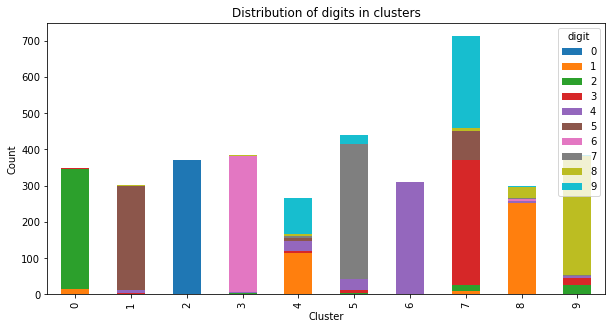

In [93]:
import matplotlib.pyplot as plt

count_df.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of digits in clusters')
plt.show()


In [62]:
silhouette = silhouette_score(X_train, clusters)
print(silhouette)

0.19143581673837


L'indice de silhouette varie entre -1 et 1, où une valeur proche de 1 indique que les points sont bien regroupés et séparés, et une valeur proche de -1 indique que les points sont mal regroupés et qu'ils devraient être dans d'autres clusters.

Pour n_clusters = 2 L'indice de silhouette est : 0.12200027294792809
Pour n_clusters = 3 L'indice de silhouette est : 0.12045676726671661
Pour n_clusters = 4 L'indice de silhouette est : 0.1341295348552531
Pour n_clusters = 5 L'indice de silhouette est : 0.14829635216232687
Pour n_clusters = 6 L'indice de silhouette est : 0.16028327068991907
Pour n_clusters = 7 L'indice de silhouette est : 0.17069435508437533
Pour n_clusters = 8 L'indice de silhouette est : 0.18065149832338986
Pour n_clusters = 9 L'indice de silhouette est : 0.1888360191042617
Pour n_clusters = 10 L'indice de silhouette est : 0.19149767423220784
Pour n_clusters = 11 L'indice de silhouette est : 0.18812652830862792
Pour n_clusters = 12 L'indice de silhouette est : 0.1893555305239719
Pour n_clusters = 13 L'indice de silhouette est : 0.1880557710051149
Pour n_clusters = 14 L'indice de silhouette est : 0.17224526099934404
Pour n_clusters = 15 L'indice de silhouette est : 0.17246734833631888
Pour n_clusters = 16 L'indice de

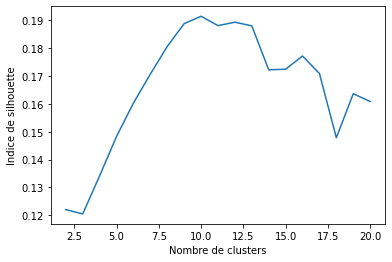

In [73]:
silhouette_avgs = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=5).fit(X_train)
    cluster = kmeans.predict(X_train)

    silhouette_avg = silhouette_score(X_train, cluster)
    silhouette_avgs.append(silhouette_avg)

    print("Pour n_clusters =", n_clusters, "L'indice de silhouette est :", silhouette_avg)

plt.plot(range(2, 21), silhouette_avgs)
plt.xlabel('Nombre de clusters')
plt.ylabel('Indice de silhouette')
plt.show()

Après plusieurs essais, on voit que l'indide ce silhouette va diminuer lorsqu'on augmente le nombre de clusters.
Le meilleur clustering est atteint pour **K = 10**. Ce qui est cohérent car on a bien 10 chiffres dans ce jeu de données.

On voit malheureusement qu'on se rapproche au maximum de 0.2 on est donc pas extrêment précis, on cherche à se rapprocher le plus de 1.

In [96]:
majority_labels = []

for i in range(count_df.shape[0]):
    majority_labels.append(count_df.iloc[i].idxmax())
    print("Cluster ", i, " - Majority class: ", majority_labels[i])


Cluster  0  - Majority class:  2
Cluster  1  - Majority class:  5
Cluster  2  - Majority class:  0
Cluster  3  - Majority class:  6
Cluster  4  - Majority class:  1
Cluster  5  - Majority class:  7
Cluster  6  - Majority class:  4
Cluster  7  - Majority class:  3
Cluster  8  - Majority class:  1
Cluster  9  - Majority class:  8


In [97]:
from scipy.spatial.distance import cdist

# Appliquer KMeans sur les données d'entraînement
kmeans = KMeans(n_clusters=10, n_init=5).fit(X_train)

# Prédire les clusters pour les données de test
clusters_test = kmeans.predict(X_test)

# Obtenir les centres de chaque cluster
cluster_centers = kmeans.cluster_centers_

# Calculer la distance entre chaque point de test et chaque centre de cluster
distances = cdist(X_test, cluster_centers, metric='euclidean')

# Prédire les labels en choisissant le cluster le plus proche
predicted_labels = []
for i in range(len(X_test)):
    min_dist = np.inf
    assigned_cluster = None
    for j in range(len(cluster_centers)):
        dist = distances[i][j]
        if dist < min_dist:
            min_dist = dist
            assigned_cluster = j
    predicted_labels.append(labels[assigned_cluster])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 0.26
- 0.27
- 0.28
- 0.29
- 10.1
- ...
Feature names seen at fit time, yet now missing:
- 1.2
- 1.3
- 14.1
- 16
- 16.1
- ...


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score

true_labels = y_train

confusion_mat = confusion_matrix(true_labels, clusters)
accuracy = accuracy_score(true_labels, clusters)

print("Confusion matrix:\n", confusion_mat)
print("Accuracy:", accuracy)


Confusion matrix:
 [[  1   0   1 372   0   0   0   1   0   0]
 [  0   0 114   0   0  15   9   1   1 249]
 [  0   4   0   0  27 329  19   1   0   0]
 [  0  10   5   0  19   5 344   0   4   2]
 [307  29  29   0   5   0   0   4   7   6]
 [  0   0   5   0   0   0  81   1 289   0]
 [  1   0   0   0   0   0   0 373   0   3]
 [  0 373   6   0   3   0   0   0   0   5]
 [  0   1   6   0 328   0   7   4   3  31]
 [  0  24  97   0   2   0 256   0   1   2]]
Accuracy: 0.0028780743066457353


## Cluster Hiérarchique

Dans ce dendrogramme, chaque branche verticale représente un cluster, et la hauteur de la branche représente la distance entre les clusters liés. Les feuilles de l'arbre représentent les observations individuelles. 

Le critère de Ward a été utilisé ici pour minimiser la somme des carrés des différences entre les observations dans chaque cluster. Ainsi, chaque fusion de cluster est effectuée en minimisant la somme des carrés des distances entre les observations et leur centroides dans le nouveau cluster formé.

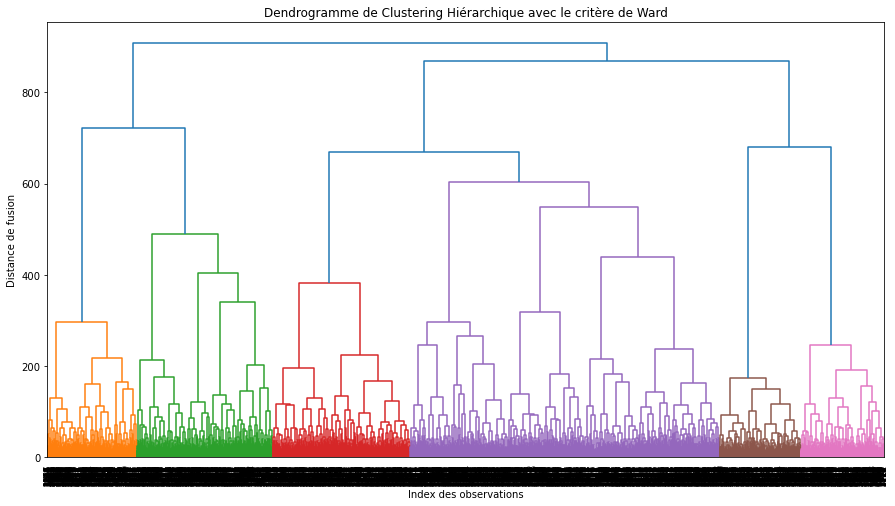

In [6]:
Hier_clust = linkage(data, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(Hier_clust, leaf_font_size=8)

k = 10
clusters = fcluster(Hier_clust, k, criterion='maxclust')

plt.xlabel('Index des observations')
plt.ylabel('Distance de fusion')
plt.title('Dendrogramme de Clustering Hiérarchique avec le critère de Ward')

plt.show()

In [7]:
silhouette_avg = silhouette_score(data, clusters)
print("L'indice de silhouette pour K={}: {:.4f}".format(k, silhouette_avg))

L'indice de silhouette pour K=10: 0.1780


In [9]:
for k in range (10,21) : 
    clusters = fcluster(Hier_clust, k, criterion='maxclust')
    silhouette_avg = silhouette_score(data, clusters)
    print("L'indice de silhouette pour K={}: {:.4f}".format(k, silhouette_avg))

L'indice de silhouette pour K=10: 0.1780
L'indice de silhouette pour K=11: 0.1826
L'indice de silhouette pour K=12: 0.1773
L'indice de silhouette pour K=13: 0.1788
L'indice de silhouette pour K=14: 0.1785
L'indice de silhouette pour K=15: 0.1749
L'indice de silhouette pour K=16: 0.1664
L'indice de silhouette pour K=17: 0.1696
L'indice de silhouette pour K=18: 0.1548
L'indice de silhouette pour K=19: 0.1548
L'indice de silhouette pour K=20: 0.1533


On voit que le meilleur indice obtenu est pour 11 clusters. Cela correspond à peu près au 10 clusters des 10 chiffres que l'on devrait avoir. Et on obtient 0.1826 contre 0.19 précédemment, on reste dans le même ordre de grandeur.

In [28]:
Hier_clust = linkage(data, method='ward')
t = 10 # seuil de distance pour le partitionnement en clusters
clusters = fcluster(Hier_clust, t, criterion='distance')
labels = clusters - 1 # les labels commencent à 1, on les décale pour qu'ils commencent à 0

cluster_counts = np.bincount(labels)
majority_labels = [None] * 10

for i in range(10):
    cluster_digits = data[labels == i]
    
    class_counts = cluster_digits.apply(pd.Series.value_counts)
    
    majority_class = class_counts.idxmax().values[0]
    
    majority_labels[i] = majority_class

print("Labels majoritaires pour chaque cluster:")
print(majority_labels)

Labels majoritaires pour chaque cluster:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
